In [2]:
import pandas as pd

In [54]:
data=pd.read_csv('SMHS_validation_students-1.csv')

In [56]:
newdata=pd.read_csv('SMHS_general-1.csv')

In [4]:
data.head()

,id,age,sex,ethnicity,latent_cluster,deprivation_index,smoking_status,alcohol_units_week,physical_activity_minutes,diet_quality_score,...,steps_per_day,fasting_glucose,fasting_insulin,triglycerides,hdl,ldl,crp,alt,shift_worker,family_history_diabetes
0,New_1501,64,M,White,2,38.797115,Never,NaN,137.058975,68.493397,...,10046.873585,6.261428,13.285703,1.672171,1.220523,4.174913,4.791479,37.253269,No,1
1,New_1502,58,F,SouthAsian,4,73.523574,Never,NaN,197.262223,56.065424,...,10752.546507,7.595936,3.382107,0.558177,1.205101,2.906692,42.129601,27.379237,Yes,0
2,New_1503,30,M,Black,3,60.183207,Never,NaN,180.377810,64.964737,...,1899.341332,7.407420,20.307675,1.812546,0.796172,3.565524,0.351280,37.622963,No,0
3,New_1504,40,F,White,1,39.046469,Never,NaN,401.335848,88.031008,...,10911.317096,5.214037,6.006388,0.888212,1.609681,3.038253,1.348363,21.692810,No,0
4,New_1505,50,F,SouthAsian,1,64.513502,Never,NaN,348.783923,81.742457,...,10738.897061,5.337186,NaN,0.677383,1.900981,2.280214,1.181209,17.143403,No,1


In [5]:
data.columns

Index(['id', 'age', 'sex', 'ethnicity', 'latent_cluster', 'deprivation_index',
       'smoking_status', 'alcohol_units_week', 'physical_activity_minutes',
       'diet_quality_score', 'depression_score', 'bmi', 'waist_hip_ratio',
       'sbp', 'dbp', 'sleep_duration_hours', 'sleep_variability_hours',
       'sleep_efficiency', 'steps_per_day', 'fasting_glucose',
       'fasting_insulin', 'triglycerides', 'hdl', 'ldl', 'crp', 'alt',
       'shift_worker', 'family_history_diabetes'],
      dtype='object')

In [57]:
cluster1=newdata[newdata['latent_cluster']==1]

In [59]:
newdata['latent_cluster'].value_counts()

latent_cluster
1    511
2    462
3    286
4    241
Name: count, dtype: int64

In [60]:
cluster1.head()

,id,age,sex,ethnicity,latent_cluster,deprivation_index,smoking_status,alcohol_units_week,physical_activity_minutes,diet_quality_score,...,fasting_glucose,fasting_insulin,triglycerides,hdl,ldl,crp,alt,shift_worker,family_history_diabetes,metabolic_pressure
7,8,39,M,White,1,58.731084,Never,NaN,333.706876,71.640782,...,4.755542,5.674614,0.668818,1.288595,2.916065,0.942681,14.251404,No,0,31.710273
13,14,34,F,White,1,31.523447,Never,NaN,252.021566,77.772151,...,5.368945,6.632524,1.118604,1.483685,2.805936,0.502674,16.567539,No,0,32.485124
19,20,46,M,White,1,13.120549,Former,NaN,262.828677,89.843354,...,4.894262,5.194073,0.922998,1.617803,2.608865,0.627407,20.170341,No,0,33.443927
20,21,28,F,White,1,58.553974,Former,NaN,183.006786,76.917137,...,5.056983,5.211631,1.172620,1.814561,3.548661,NaN,11.788960,No,0,30.322899
22,23,54,F,White,1,10.208416,Never,NaN,88.888040,86.915124,...,5.039694,3.943117,0.668756,1.732665,1.873895,0.609782,19.853259,No,0,39.842712


In [61]:
cluster1['id'].nunique()

511

In [62]:
cluster2=data[data['latent_cluster']==2]

In [63]:
cluster3=data[data['latent_cluster']==3]

In [64]:
cluster4=data[data['latent_cluster']==4]

In [78]:
bmi1=cluster1['bmi']


In [76]:
bmi2=cluster2['bmi']

In [79]:
bmi3=cluster3['bmi']

In [80]:
bmi4=cluster4['bmi']

In [90]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# Make sure latent_cluster is treated as category
newdata['latent_cluster'] = newdata['latent_cluster'].astype('category')


In [91]:
summary = newdata.groupby('latent_cluster').agg({
    'bmi':'mean',
    'waist_hip_ratio':'mean',
    'fasting_glucose':'mean',
    'fasting_insulin':'mean',
    'triglycerides':'mean',
    'hdl':'mean',
    'ldl':'mean',
    'alt':'mean',
    'crp':'mean',
    'sbp':'mean',
    'dbp':'mean',
    'sleep_duration_hours':'mean',
    'sleep_efficiency':'mean',
    'steps_per_day':'mean',
    'depression_score':'mean'
}).round(2)

summary


,bmi,waist_hip_ratio,fasting_glucose,fasting_insulin,triglycerides,hdl,ldl,alt,crp,sbp,dbp,sleep_duration_hours,sleep_efficiency,steps_per_day,depression_score
latent_cluster,,,,,,,,,,,,,,,
1,23.01,0.82,4.95,6.28,0.82,1.61,2.60,18.41,1.01,121.10,75.84,7.65,93.65,11166.22,3.64
2,34.88,0.92,5.99,14.62,1.95,1.20,3.60,28.95,4.31,135.46,83.12,6.39,89.06,8348.42,7.04
3,34.24,0.96,6.62,27.35,2.97,0.99,3.25,41.05,8.09,142.67,88.03,5.88,85.03,6150.18,8.53
4,23.08,0.86,7.22,4.31,1.03,1.40,2.79,22.87,2.44,129.99,78.85,6.87,90.84,9377.61,6.42


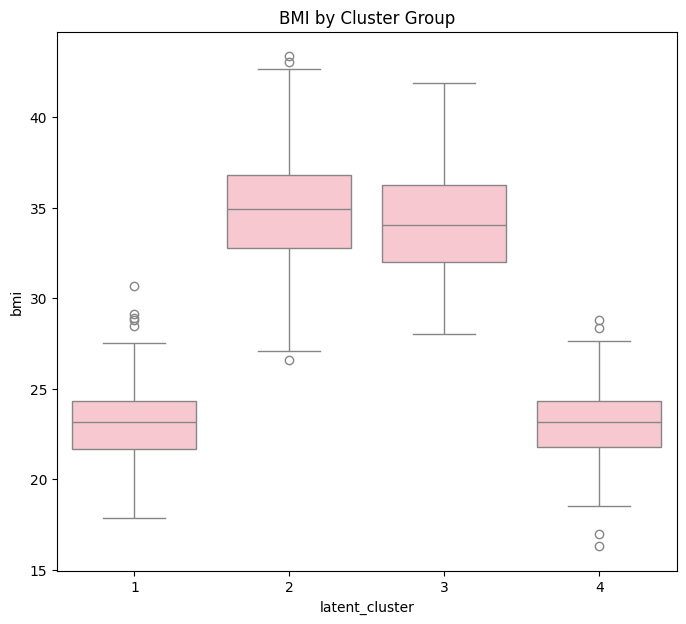

In [102]:
plt.figure(figsize=(8,7))
sns.boxplot(data=newdata, x='latent_cluster', y='bmi',color='pink')
plt.title("BMI by Cluster Group")
plt.show()


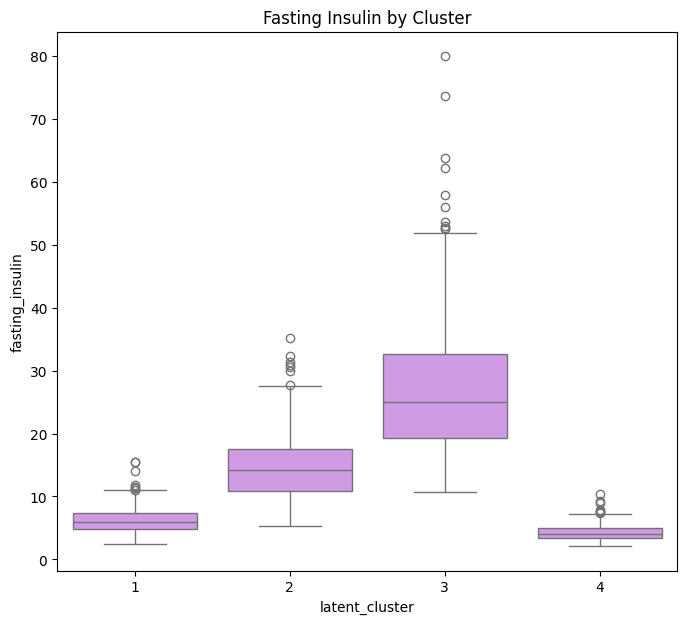

In [107]:
plt.figure(figsize=(8,7))
sns.boxplot(data=newdata, x='latent_cluster', y='fasting_insulin',color='#d78df2')
plt.title("Fasting Insulin by Cluster")
plt.show()


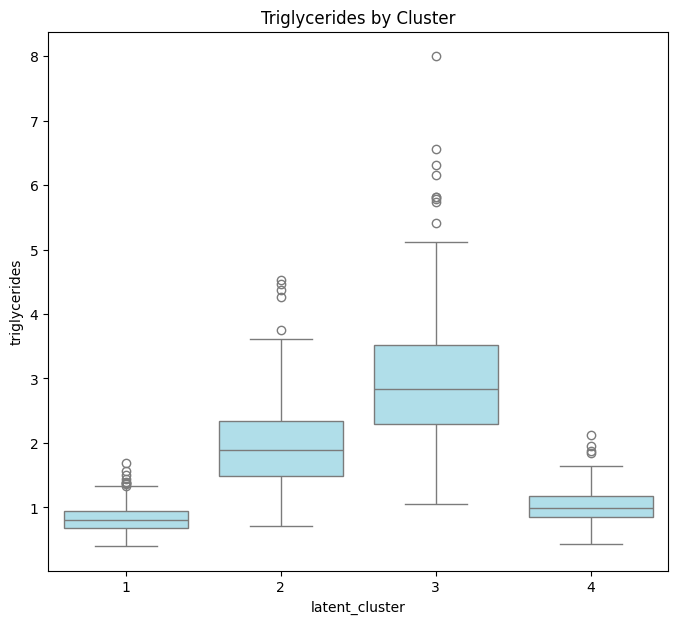

In [108]:
plt.figure(figsize=(8,7))
sns.boxplot(data=newdata, x='latent_cluster', y='triglycerides',color='#a7e4f2')
plt.title("Triglycerides by Cluster")
plt.show()


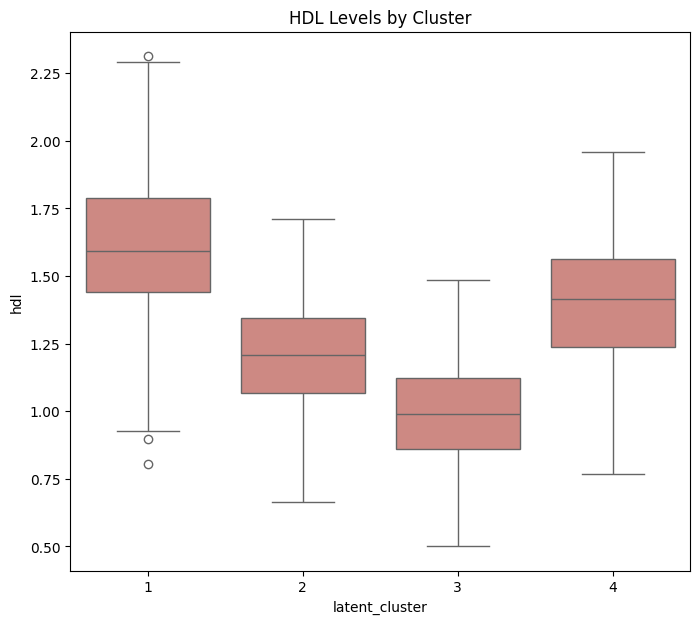

In [110]:
plt.figure(figsize=(8,7))
sns.boxplot(data=newdata, x='latent_cluster', y='hdl',color='#d97e77')
plt.title("HDL Levels by Cluster")
plt.show()

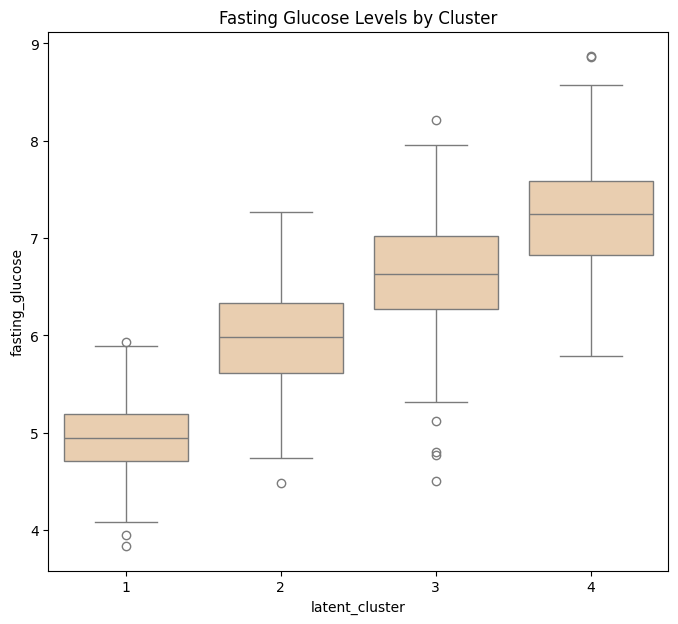

In [112]:
plt.figure(figsize=(8,7))
sns.boxplot(data=newdata, x='latent_cluster', y='fasting_glucose',color='#f2cea7')
plt.title("Fasting Glucose Levels by Cluster")
plt.show()

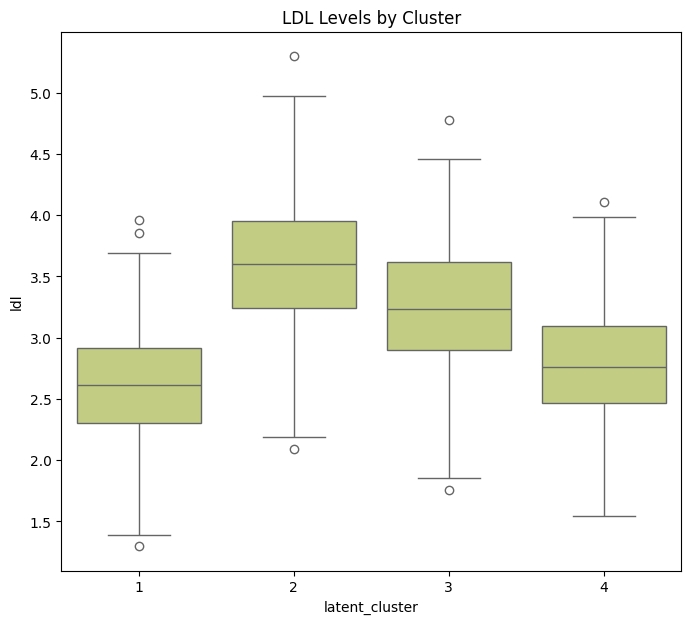

In [114]:
plt.figure(figsize=(8,7))
sns.boxplot(data=newdata, x='latent_cluster', y='ldl',color='#cad977')
plt.title("LDL Levels by Cluster")
plt.show()

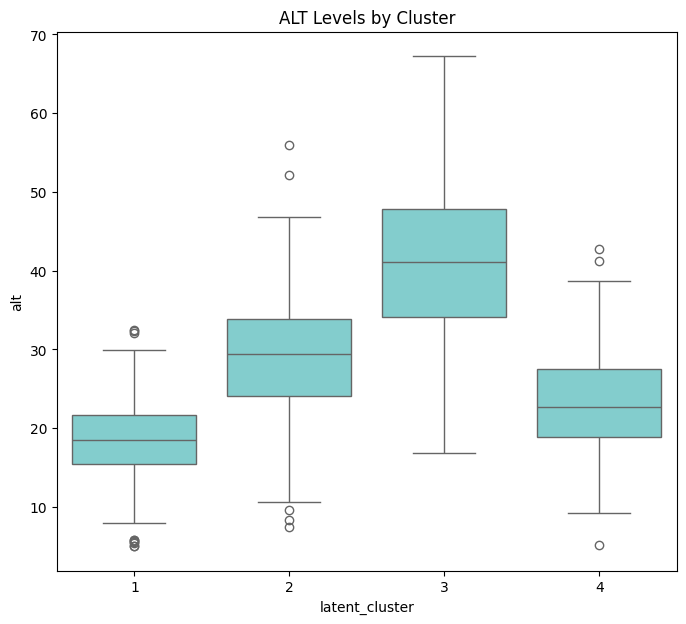

In [116]:
plt.figure(figsize=(8,7))
sns.boxplot(data=newdata, x='latent_cluster', y='alt',color='#77d9d9')
plt.title("ALT Levels by Cluster")
plt.show()

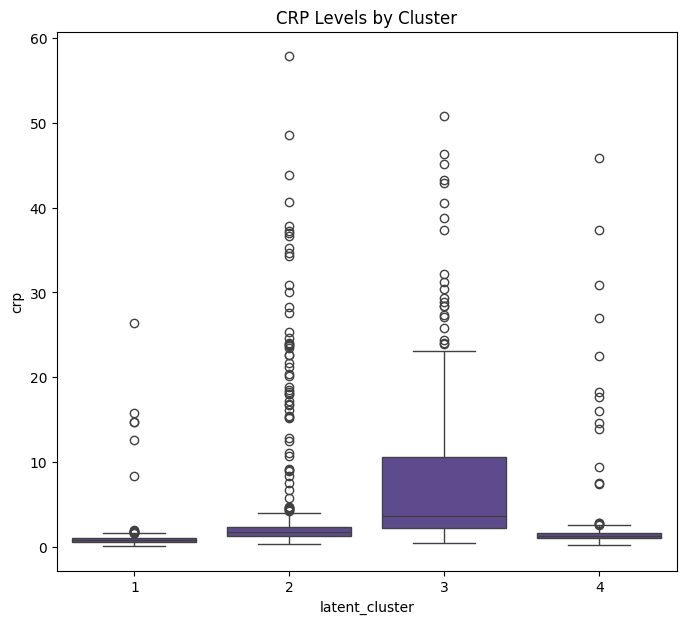

In [118]:
plt.figure(figsize=(8,7))
sns.boxplot(data=newdata, x='latent_cluster', y='crp',color='#594099')
plt.title("CRP Levels by Cluster")
plt.show()

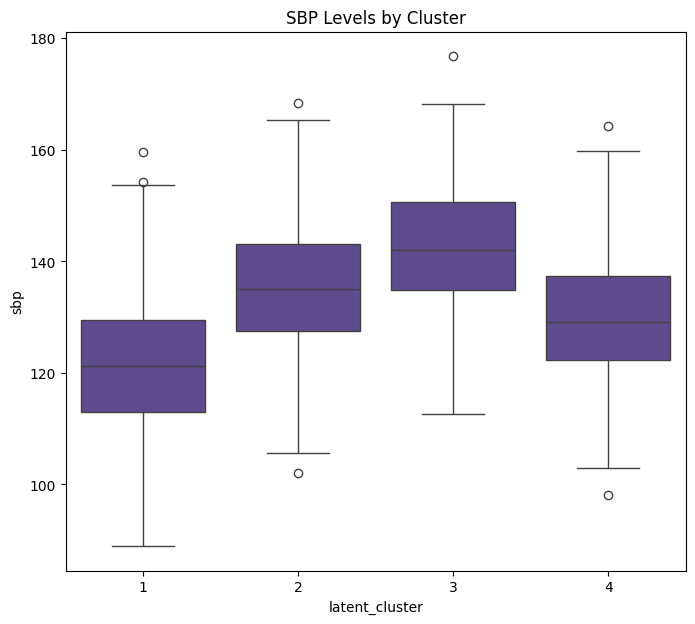

In [119]:
plt.figure(figsize=(8,7))
sns.boxplot(data=newdata, x='latent_cluster', y='sbp',color='#594099')
plt.title("SBP Levels by Cluster")
plt.show()

In [120]:
vars_for_heatmap = [
    'bmi', 'waist_hip_ratio', 'fasting_glucose', 'fasting_insulin',
    'triglycerides', 'hdl', 'ldl', 'alt', 'crp',
    'sleep_duration_hours', 'sleep_efficiency',
    'steps_per_day', 'depression_score'
]


In [122]:
cluster_means = newdata.groupby('latent_cluster')[vars_for_heatmap].mean()


In [123]:
scaled = (cluster_means - cluster_means.mean()) / cluster_means.std()


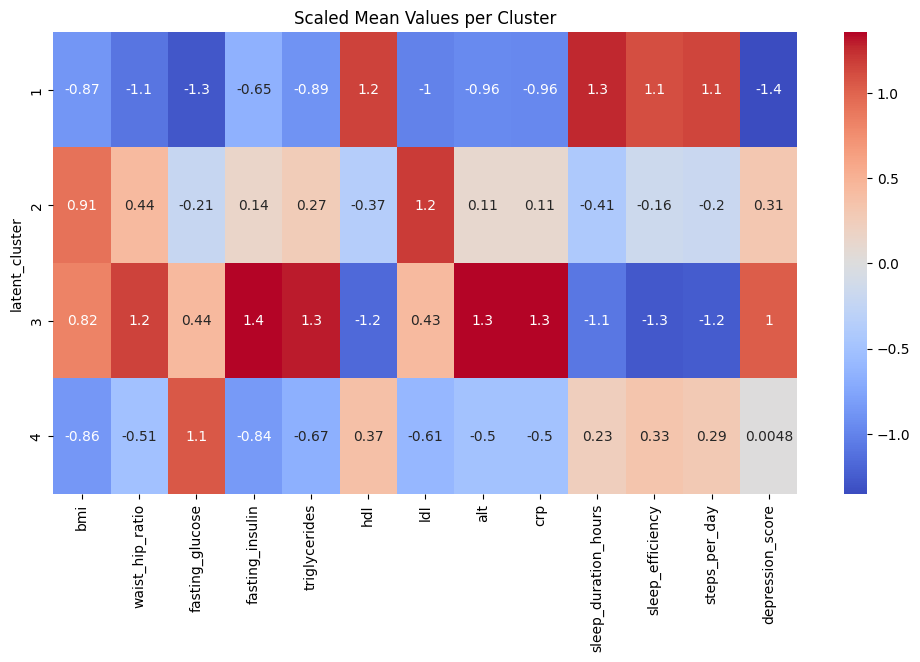

In [131]:
plt.figure(figsize=(12,6))
sns.heatmap(scaled, cmap='coolwarm', annot=True)
plt.title("Scaled Mean Values per Cluster")
plt.show()
#High BMI + high triglycerides + high insulin → obesity-driven cluster

#High ALT + insulin + CRP → NAFLD-like/insulin-resistant cluster

#Low everything → metabolically healthy cluster

#High glucose + low insulin → insulin-deficient cluster

In [132]:
smoking_map = {
    'Former': 'Former',
    'F+ormer': 'Former',
    
    'Never': 'Never',
    'Ne^ver': 'Never',
    'Nev*er': 'Never',
    'Nev_er': 'Never',

    'Current': 'Current',
    '.Current': 'Current'
}


In [134]:
newdata['smoking_status'] = newdata['smoking_status'].replace(smoking_map)


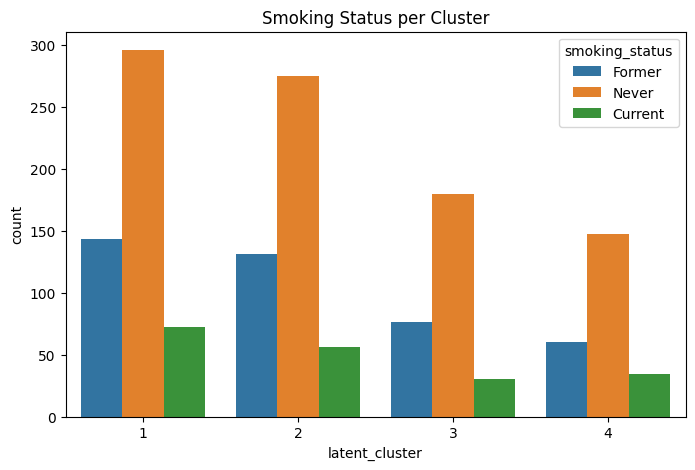

In [135]:
plt.figure(figsize=(8,5))
sns.countplot(data=newdata, x='latent_cluster', hue='smoking_status')
plt.title("Smoking Status per Cluster")
plt.show()
